# Q1

In [41]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from PIL import Image
import warnings
import pickle
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')

### a

In [42]:
# Load the image using PIL
img = Image.open("Cliff_beach_BOEM_gov.jpg")

In [43]:
# Convert the image to a numpy array
img_arr = np.array(img)

# Get the dimensions of the image
width, height, colour  = img_arr.shape
print("Image width: {}, height: {}, that is number of pixels. And for each pixel we have {} colours (RGB).".format(width, height, colour))

Image width: 1830, height: 2746, that is number of pixels. And for each pixel we have 3 colours (RGB).


Width and height value are the number of pixels. The value of the 3rd dimension is the colour from RGB method (0-255,0-255,0-255).

### b

In [44]:
img_arr_sum = img_arr.sum(axis=2)

In [45]:
# Normalize the image by subtracting the mean and dividing by the standard deviation
img_arr_normalized = (img_arr_sum - np.mean(img_arr_sum)) / np.std(img_arr_sum)

Plot the original and normalized images side by side:

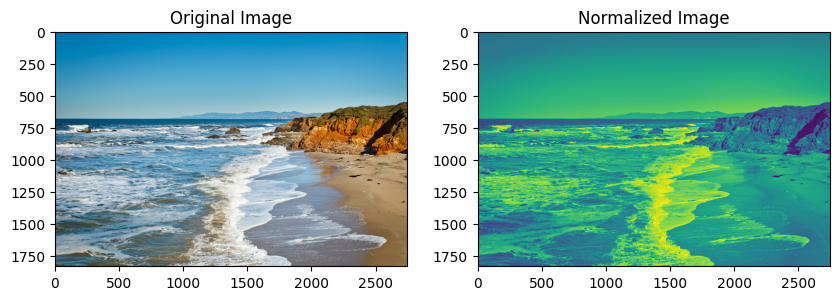

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(img_arr)
ax1.set_title("Original Image")
ax2.imshow(img_arr_normalized)
ax2.set_title("Normalized Image")
plt.show()

<br> We got the negative of the picture that we had before. The normalization process reduced the overall contrast of the image

### c

In [47]:
# Perform SVD decomposition and obtain the singular values
U, s, Vt = np.linalg.svd(img_arr_normalized)
print("Number of singular values is:", len(s))

Number of singular values is: 1830


We have exactly this number of singular values due the fact that 1830 is the width of our picture that is dim of the matrix

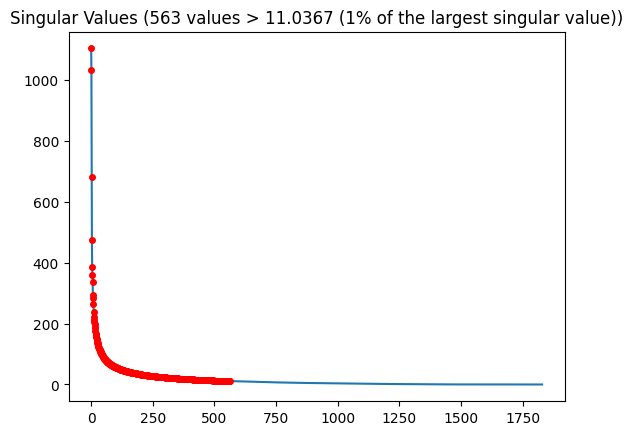

In [48]:
# Plot the singular values and the threshold
threshold = 0.01 * s[0] # 1% of the largest singular value
num_singular_values = np.sum((s > threshold))
plt.plot(s)
plt.plot(s[s > threshold], 'ro', markersize=4)
plt.title(f"Singular Values ({num_singular_values} values > {threshold:.4f} (1% of the largest singular value))")
plt.show()

### d

In [49]:
original_img_size, norm_img_size = sys.getsizeof(img_arr),  sys.getsizeof(img_arr_normalized)

Reconstructed Image Size with 563 PCs: 40201568 bytes


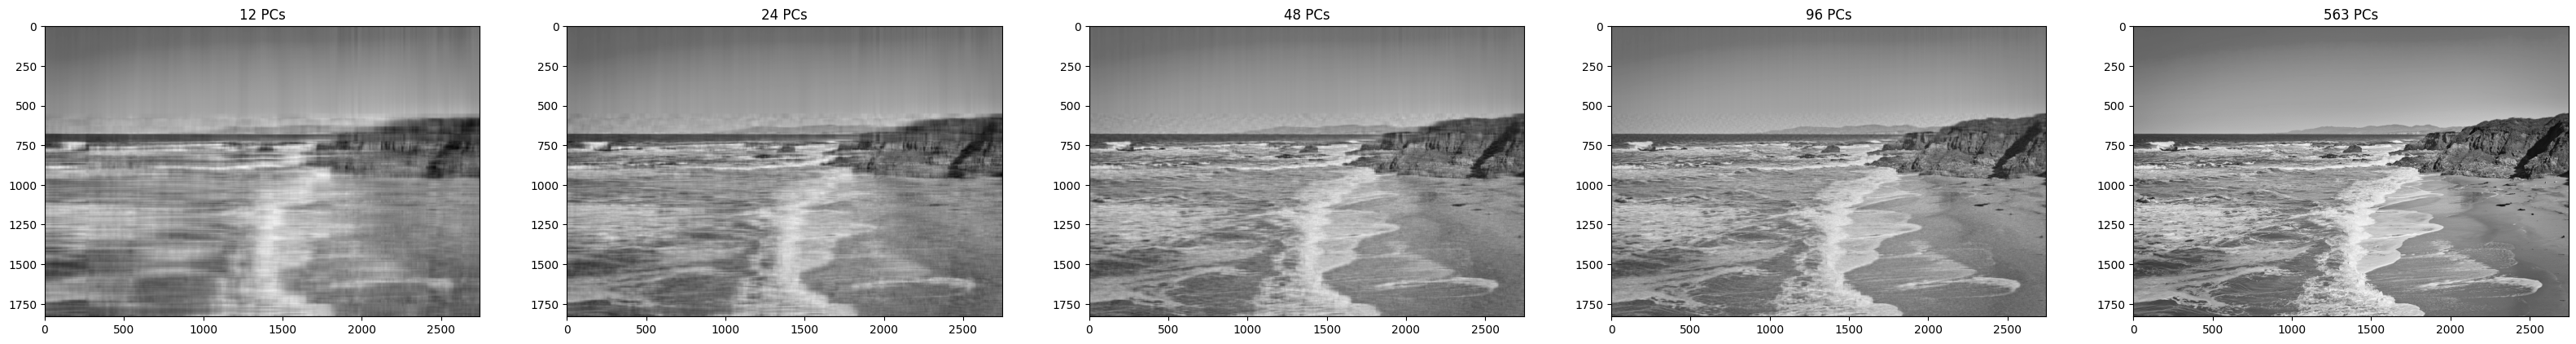

In [57]:
pcs = [12, 24, 48, 96, len(s[s > threshold])]

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(40,8))
for i, num_pc in enumerate(pcs):
# Calculate the number of principal components required to obtain the desired number of PCs
    img_reconstructed = U[:, :num_pc] @ np.diag(s[:num_pc]) @ Vt[:num_pc, :]
    # Display the reconstructed image
    axs[i].imshow(img_reconstructed, cmap='gray')
    axs[i].set_title(f"{num_pc} PCs")
    # Calculate the size of the final reconstruction
    size = sys.getsizeof(img_reconstructed)
print(f"Reconstructed Image Size with {num_pc} PCs: {size} bytes")
plt.show()


<br> First of all, we have used gray pictures (cmap='gray') because much easier to recognize the difference between pictures with different PC's with b&w than negative one.
<br> So what we can conclude from the pictures?
When we are reducing the number of PC's from 563 to 96 there is no big difference between pictures that means that first 96 PC's explain the most of the variance in the given normalized picture that is great evidence why we need PCA algorithm. But if we take a look on 12 PC's picture we would see clear difference with the full picture that means that 12 PC's is not enough for the good picture, but still we can see approximately what is on the picture that is good but not enough for us if we want to downgrade the number of PC's with minimum influence on the quality, but may be good for other purposes. <br>
Also important to add that on the graph of singular values we've seen that first of them have much higher values than others that means that they explain most of the variance of the picture colours.

# Q2